<a href="https://colab.research.google.com/github/HambaliMarcel/Course-Scraping-2024/blob/main/RecommendationCourseUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
import re
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')

Model Loaded


In [ ]:
def embed(texts):
    return model(texts)
embed(['Hinterland & Infrastructure Management'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-0.06308862,  0.05868904,  0.00704258,  0.05582763, -0.06635044,
         0.03536211, -0.0369168 ,  0.0270292 ,  0.03359727, -0.0205071 ,
        -0.06140168, -0.01428484, -0.04196922, -0.05555441,  0.01238482,
        -0.04742478,  0.06901927,  0.05781294, -0.04569658, -0.00953856,
         0.05521912,  0.04016589, -0.03892832,  0.00439513, -0.01770432,
        -0.02489056,  0.04920398,  0.00455221, -0.04720863,  0.01476715,
        -0.06907956,  0.04006665, -0.02192955, -0.04507225,  0.06194935,
         0.04715956,  0.02865329,  0.05310094,  0.01746131, -0.07317872,
         0.02769251, -0.00783216,  0.01105209, -0.08311234, -0.02778551,
        -0.00543244, -0.0141525 ,  0.03523687,  0.05308096,  0.003343  ,
         0.02804599, -0.01739946,  0.0357793 , -0.02051741,  0.07008216,
         0.04554104,  0.01914545,  0.0202877 ,  0.07458151,  0.02161109,
         0.04045007,  0.0482715 , -0.00010123,  0.07032166, -0.01153661,
 

In [ ]:
df = pd.read_csv("DatasetCourse.csv", engine="python")
df.head()

,Name,Power Summary,Platform
0,"3C (Communication, Coordination, Collaboration...","Kursus 3C (Communication, Coordination, Collab...",PORTAVERSE
1,Adaptif Membangun Budaya Kerja yang Transparan...,Kursus Adaptif Membangun Budaya Kerja yang Tra...,PORTAVERSE
2,Adaptive Leadership Action and Contribution To...,Kursus Adaptive Leadership Action and Contribu...,PORTAVERSE
3,ALPI’s insight from USA Immersion,Kursus ALPI’s insight from USA Immersion memba...,PORTAVERSE
4,Diversity for Innovation and Business Creativity,Kursus Diversity for Innovation and Business C...,PORTAVERSE


In [ ]:
df = df[["Name", "Power Summary", "Platform"]]
df.head()

,Name,Power Summary,Platform
0,"3C (Communication, Coordination, Collaboration...","Kursus 3C (Communication, Coordination, Collab...",PORTAVERSE
1,Adaptif Membangun Budaya Kerja yang Transparan...,Kursus Adaptif Membangun Budaya Kerja yang Tra...,PORTAVERSE
2,Adaptive Leadership Action and Contribution To...,Kursus Adaptive Leadership Action and Contribu...,PORTAVERSE
3,ALPI’s insight from USA Immersion,Kursus ALPI’s insight from USA Immersion memba...,PORTAVERSE
4,Diversity for Innovation and Business Creativity,Kursus Diversity for Innovation and Business C...,PORTAVERSE


In [ ]:
titles = list(df['Power Summary'])
titles[:1]

['Kursus 3C (Communication, Coordination, Collaboration) For Better Synergy membahas Dalam rangka meningkatkan produktivitas dan menurunkan biaya logistik nasional, diperlukan penerapan core values AKHLAK. Pada siniar kali ini akan membahas value kolaboratif yang diterapkan oleh Pelindo terkait komunikasi. terlebih lagi pada era digital sekarang yang menuntut kita untuk selalu berkolaborasi dengan rekan-rekan kerja sehingga penting untuk menerapkan value kolaboratif dalam kegiatan pekerjaan agar mencapai suatu tujuan yang telah ditentukan . Tujuan dari kursus ini adalah Objective .Kursus ini membahas tentang No Outline']

In [ ]:
embeddings = embed(titles)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (5528, 512)


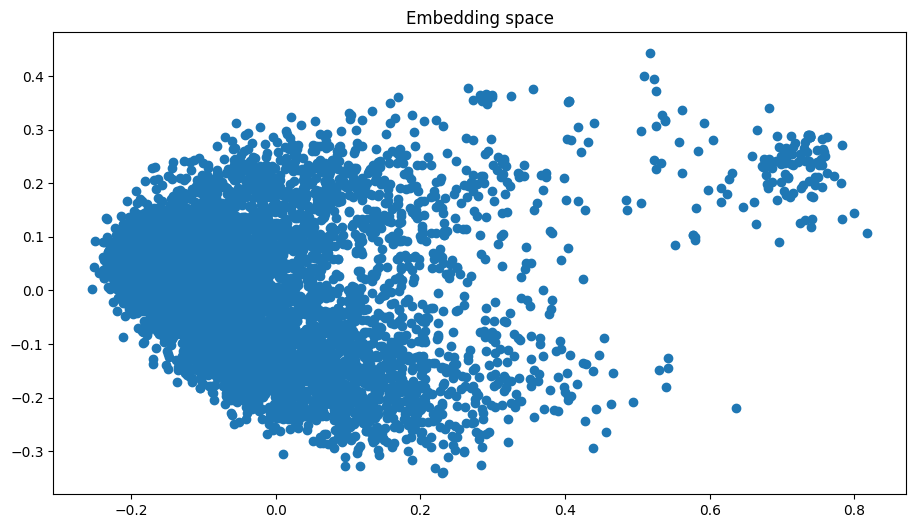

In [ ]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [ ]:
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [ ]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df[['Name', 'Platform']].iloc[neighbors].values.tolist()

In [ ]:
print('Recommended Course:')
recommend("Hinterland")

Recommended Course:


[['Seminar of Port Management & Concessions', 'PORTAVERSE'],
 ['Unlock Hidden Revenue di Rumah Sakit', 'PORTAVERSE'],
 ['Offshore Wind Energy', 'MARITIME TRAINING ACADEMY'],
 ['Intermodal Transport & Hinterland', 'STC'],
 ['Port Development & Logistics', 'STC'],
 ['Smart Port Technologies', 'APEC'],
 ['Incoterms in Door to Door Logistics', 'PORTAVERSE'],
 ['Mengenal Operasi Crane (QCC/STS) Langsung dari Cabin Operator',
  'PORTAVERSE'],
 ['Freight Forwarding and Its Business: The Architect of Logistics Services',
  'PORTAVERSE'],
 ['Freight Forwarding and Its Business: The Architect of Logistics Services',
  'PORTAVERSE']]